# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `6` | `Questions`

> Hi, Team. 👋

> I hope you are having a restful recess week. The purpose of the current exercise problem sets is to consolidate and expand the understanding of algorithmic trading tool kits that you have developed in the course.

> Building on what you have learned thus far, these problem sets will ask you to create trading strategies, capitalizing on commonly used technical indicators.

> Please submit your answers via the submission portal at eLearn. Again, it would be a good practice to attempt to answer these questions within the designated time limit.

> As with the previous exercise problem sets, the questions are written in such a way that helps advance your learning, rather than testing you.

> Enjoy!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 Questions 1 to 4 ask you to build, execute, and backtest a strategy based on one kind of momentum strategy called the `Moving Average Convergence Divergence` (MACD) crossover.

### <font color = blue> 👉 Question 1</font>. Let’s take a look at Apple (AAPL) as our security of interest, over the three-year period of 2015 through 2017.

#### Moving Average Convergence Divergence (`MACD`) is a lagging, trend-following momentum indicator reflecting the relationship between two moving averages of stock prices.

#### The strategy utilizes two indicators, the MACD and the MACD signal line:

- The MACD is defined as the `difference` between the `12`-day ***exponential*** moving average and the `26`-day exponential moving average.
- The MACD signal line is then defined as the `9`-day ***exponential*** moving average of the MACD.

### <font color = green> NOTE: The MACD crossover strategy is defined as:

- A `bullish` crossover arises when the MACD line turns `upward and crosses` beyond the MACD signal line.
- A `bearish` crossover arises when the MACD line turns `downward and crosses` under the MACD signal line.

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

In [3]:
apple_df = pdr.get_data_yahoo("AAPL", 
                  start = dt.datetime(2015, 1, 2), 
                  end = dt.datetime(2017, 12, 31))

In [4]:
SHORT = 12
LONG = 26
signal_period = 9

In [5]:
apple_df2 = pd.DataFrame(index = apple_df.index)

In [6]:
apple_df2['Adj Close'] = apple_df[['Adj Close']]
apple_df2['EMA_short'] = apple_df[['Adj Close']].ewm(span = SHORT, adjust = False).mean()
apple_df2['EMA_long'] = apple_df[['Adj Close']].ewm(span = LONG, adjust = False).mean()
apple_df2['MACD'] = apple_df2['EMA_short'] - apple_df2['EMA_long']
apple_df2['MACD_Signal'] = apple_df2[['MACD']].ewm(span = signal_period).mean()
apple_df2['Position'] = np.where(apple_df2['MACD'] > apple_df2['MACD_Signal'], 1, -1)

### <font color = red> Answer 1 is presented in the cell below: </font>

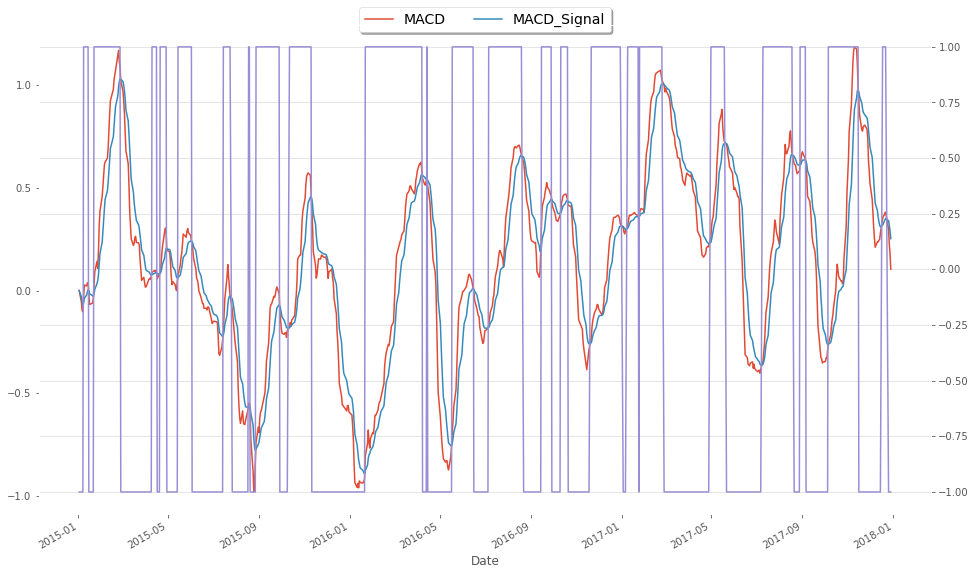

In [7]:
ax = apple_df2[['MACD', 
           'MACD_Signal', 
           'Position']].plot(figsize = (16, 10), 
                            secondary_y = 'Position')

ax.legend(loc = 'upper center', 
         bbox_to_anchor = (0.5, 1.05), 
         ncol = 3, shadow = True)

### <font color = blue> 👉 Question 2</font>. Let’s suppose that you started from a $100,000 capital base for the given security.

### Given a $5 fixed commission fee per trade, how much in cumulative returns could you have had as a result of the MACD crossover strategy?

### Below are the lines of code that lead to an answer:

In [8]:
capital_base = 100000
commission_fee = 5

In [9]:
apple_df2['RETURN'] = np.log(apple_df2['Adj Close'] / apple_df2['Adj Close'].shift(1))
apple_df2['STRATEGY'] = apple_df2['Position'].shift(1) * apple_df2['RETURN']

cum_return = ((((apple_df2['STRATEGY'].cumsum().apply(np.exp)[-1]) * 100000) - \
(5 * (apple_df2['Position'] * apple_df2['Position'].shift(1) < 0).sum()))/ 100000) - 1

In [10]:
print('I could have {} % as a result of MACD crossover strategy in cumulative return'.format(round(cum_return, 4)))

I could have 0.8934 % as a result of MACD crossover strategy in cumulative return


### <font color = red> Answer 2 </font>

    The answer is 89.34 % .

### <font color = blue> 👉 Question 3</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

In [11]:
apple_df2['CUMULATIVE_RETURN'] = apple_df2['STRATEGY'].cumsum().apply(np.exp)
apple_df2['MAX_GROSS_PERFORMANCE'] = apple_df2['CUMULATIVE_RETURN'].cummax()

<AxesSubplot:xlabel='Date'>

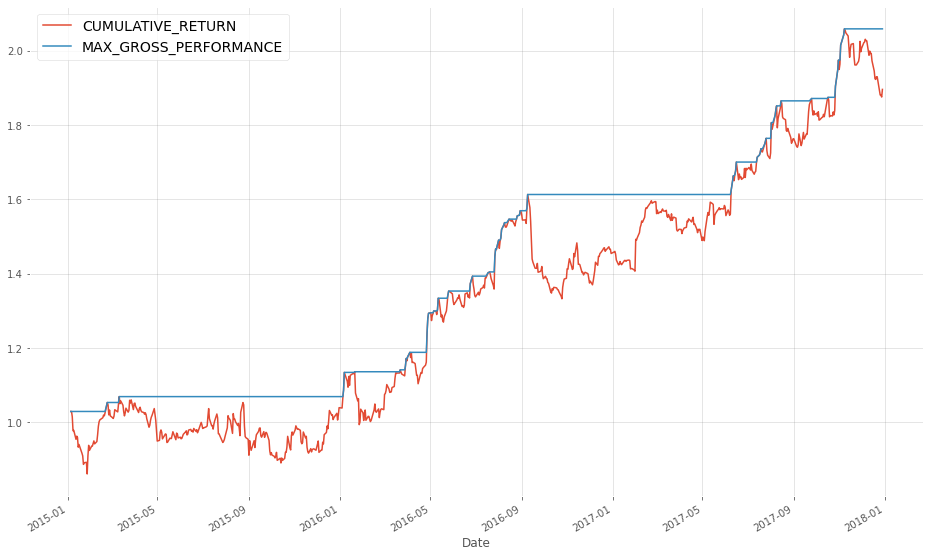

In [12]:
apple_df2[['CUMULATIVE_RETURN', "MAX_GROSS_PERFORMANCE"]].dropna().plot(figsize = (16, 10))

In [49]:
drawdown = apple_df2['MAX_GROSS_PERFORMANCE'] - apple_df2['CUMULATIVE_RETURN']
drawdown = drawdown.dropna()

In [75]:
period = (drawdown[drawdown == 0].index[1:].to_pydatetime() - 
         drawdown[drawdown == 0].index[:-1].to_pydatetime())

periods_df = pd.DataFrame(period, columns = ['period']).sort_values(by = 'period', ascending = False).head()
periods_df

,period
2,301 days
37,273 days
5,61 days
0,49 days
54,41 days


In [86]:
print('The worst drawdown period duration is {} days'.format(periods_df.iloc[0,0].days))

The worst drawdown period duration is 301 days


In [88]:
print('The second worst drawdown period duration is {} days'.format(periods_df.iloc[1, 0].days))

The second worst drawdown period duration is 273 days


In [89]:
print('The third worst drawdown period duration is {} days'.format(periods_df.iloc[2, 0].days))

The third worst drawdown period duration is 61 days


In [90]:
print('The fourth worst drawdown period duration is {} days'.format(periods_df.iloc[3, 0].days))

The fourth worst drawdown period duration is 49 days


In [91]:
print('The fifth worst drawdown period duration is {} days'.format(periods_df.iloc[4, 0].days))

The fifth worst drawdown period duration is 41 days


In [106]:
worst_drawdown = drawdown.loc[drawdown[drawdown == 0].\
                              index[periods_df.index[0]]:drawdown[drawdown == 0].index[periods_df.index[0] + 1]].max()
worst_drawdown

0.17856697953616474

In [99]:
print('The worst drawdown period net drawdown rate is {} percentage points'.\
      format(round(worst_drawdown, 4) * 100))

The worst drawdown period net drawdown rate is 17.86 percentage points


In [109]:
worst_drawdown2 = drawdown.loc[drawdown[drawdown == 0].\
                              index[periods_df.index[1]] : drawdown[drawdown == 0].\
                               index[periods_df.index[1] + 1]].max()
worst_drawdown2

0.2807034073207173

In [110]:
print("The second worst drawdown period net drawdown rate is {} percentage points".\
      format(round(worst_drawdown2, 4) * 100))

The second worst drawdown period net drawdown rate is 28.07 percentage points


In [112]:
worst_drawdown3 = drawdown.loc[drawdown[drawdown == 0].\
            index[periods_df.index[2]] : drawdown[drawdown == 0].\
                 index[periods_df.index[2] + 1]].max()

worst_drawdown3

0.1424166584405796

In [113]:
print("The third worst drawdown period net drawdown rate is {} percentage points".\
     format(round(worst_drawdown3, 4) * 100))

The third worst drawdown period net drawdown rate is 14.24 percentage points


In [118]:
worst_drawdown4 = drawdown.loc[drawdown[drawdown == 0].\
            index[periods_df.index[3]] : drawdown[drawdown == 0].\
            index[periods_df.index[3] + 1]].max()

In [119]:
print('The fourth worst drawdown period net drawdown rate is {} percentage points'.\
     format(round(worst_drawdown4, 4) * 100))

The third worst drawdown period net drawdown rate is 16.82 percentage points


In [122]:
worst_drawdown5 = drawdown.loc[drawdown[drawdown == 0].\
                               index[periods_df.index[4]] : drawdown[drawdown == 0].\
                               index[periods_df.index[4] + 1]].max()

In [123]:
print('The fifth worst drawdown period net drawdown rate is {} percentage points'.\
     format(round(worst_drawdown5, 4) * 100))

The fifth worst drawdown period net drawdown rate is 12.49 percentage points


### <font color = red> Answer 3 </font>

    The Worst drawdown period     : Net drawdown 17.86 % | Duration 301 Days
    
    The 2nd worst drawdown period : Net drawdown 28.07 % | Duration 273 Days
     
    The 3rd worst drawdown period : Net drawdown 14,24 % | Duration 61 Days
         
    The 4th worst drawdown period : Net drawdown 16.82 % | Duration 49 Days
    
    The 5th worst drawdown period : Net drawdown 12.49 % | Duration 41 Days

### <font color = blue> 👉 Question 4</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

In [126]:
apple_2015 = apple_df2.loc['2015']

In [138]:
annual_return2015 = (100 * apple_2015['CUMULATIVE_RETURN'].iloc[-1] - 100) / 100
annual_return2015

0.03918539239799415

In [153]:
apple_2016 = apple_df2.loc['2016']

apple_2016['CUMULATIVE_RETURN'] = apple_2016['STRATEGY'].cumsum().apply(np.exp)

annual_return2016 = (100 * apple_2016['CUMULATIVE_RETURN'].iloc[-1] - 100) / 100


/var/folders/wb/qzrcgmhs6t7182jnxtznddxr0000gn/T/ipykernel_27170/1384114222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_2016['CUMULATIVE_RETURN'] = apple_2016['STRATEGY'].cumsum().apply(np.exp)


0.39927211617481617

In [155]:
apple_2017 = apple_df2.loc['2017']

apple_2017['CUMULATIVE_RETURN'] = apple_2017['STRATEGY'].cumsum().apply(np.exp)

annual_return2017 = (100 * apple_2017['CUMULATIVE_RETURN'].iloc[-1] - 100) / 100
annual_return2017

/var/folders/wb/qzrcgmhs6t7182jnxtznddxr0000gn/T/ipykernel_27170/2301655450.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_2017['CUMULATIVE_RETURN'] = apple_2017['STRATEGY'].cumsum().apply(np.exp)


0.3037124196904091

In [156]:
average_return = (annual_return2015 + annual_return2016 + annual_return2017) / 3
average_return

0.26566698506903375

### <font color = red> Answer 4 </font>

    Below average year(s) : 2015 
    
    Above average year(s) : 2016, 2017
     

###  <font color = blue> 👉 Question 5. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

In [146]:
sharpe = np.sqrt(252) * apple_df2['STRATEGY'].mean() / apple_df2['STRATEGY'].std()
sharpe

0.9349545939641782

In [148]:
print("The annualized Sharpe ratio of the current investment straetgy is {}".format(round(sharpe, 5)))

The annualized Sharpe ratio of the current investment straetgy is 0.93495


### <font color = red> Answer 5 </font>
    
    Sharpe ratio: 0.93495
    

## 👇 Questions 6 to 10 ask you to answer the above questions using your `customized functions` to `scale up`.

### Below you will find the above questions repeated, but this time you need to compare the results across the following six stocks:

### `MSFT`

### `AMZN`

### `UAL`

### `DAL`

### `XOM`

### `CVX`

### <font color = green> NOTE: When answering the questions below, please hold all the conditions (i.e., investment horizon; capital base; deployment of `MACD crossover strategy`; the flat commission fee, etc.) constant, as you did above. 
    
### <font color = green> That is, the `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade. Given the iterative nature of the questions below, writing and using your customized functions will be helpful as you answer the questions.

###  <font color = blue> 👉 Question 6. </font>  Please visualize buy and sell positions for each of the six stocks. 

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 6 is presented in the cell below: </font>

###  <font color = blue> 👉 Question 7. </font> Which of the six stocks performs the best, based on cumulative returns?

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 7 </font>

    The answer is __________________________________________ .

###  <font color = blue> 👉 Question 8. </font> Which of the stocks displays the worst max drawdown, based on net drawdown % and the number of days?

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 8 </font>

    The answer is __________________________________________ .

###  <font color = blue> 👉 Question 9. </font> Looking at each of the six stocks’ annual returns, which year for which stocks shows the best performance?

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 9 </font>

    The answer is __________________________________________ .

###  <font color = blue> 👉 Question 10. </font> Which of the six stocks make the current strategy investment performance? Please rank the seven stocks based on their annualized Sharpe ratio.

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 10 </font>

    MSFT ____________
    
    AMZN ____________

    UAL  ____________

    DAL  ____________

    XOM  ____________
    
    CVX  ____________

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊